webscraping for sitemaps

In [41]:
import requests
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor, as_completed

Get URLs from sitemap

In [42]:
sitemap_url = "https://www.yarnit.app/sitemap.xml"
page = requests.get(sitemap_url)
soup = BeautifulSoup(page.content, 'xml')
urls = [loc.get_text().strip() for loc in soup.find_all('loc') if '.pdf' not in loc.get_text()]


Full Data Collection Code (Build site_content_index)

In [43]:
def extract_page_data(url):
    try:
        res = requests.get(url, timeout=5)
        res.raise_for_status()
        soup = BeautifulSoup(res.content, 'html.parser')

        title = soup.title.get_text(strip=True) if soup.title else ""

        # Meta description
        meta_tag = soup.find("meta", attrs={"name": "description"})
        meta_description = meta_tag["content"].strip() if meta_tag and "content" in meta_tag.attrs else ""

        # Headings
        h1_tags = [h.get_text(strip=True) for h in soup.find_all("h1")]
        h2_tags = [h.get_text(strip=True) for h in soup.find_all("h2")]
        h3_tags = [h.get_text(strip=True) for h in soup.find_all("h3")]

        return {
            "url": url,
            "title": title,
            "meta_description": meta_description,
            "h1": h1_tags,
            "h2": h2_tags,
            "h3": h3_tags
        }

    except Exception as e:
        return {
            "url": url,
            "title": f"Error: {e}",
            "meta_description": "",
            "h1": [],
            "h2": [],
            "h3": []
        }


parallel execution

In [44]:
site_content_index = []

with ThreadPoolExecutor(max_workers=10) as executor:
    futures = {executor.submit(extract_page_data, url): url for url in urls}
    for future in as_completed(futures):
        result = future.result()
        site_content_index.append(result)


Print all results at once

In [45]:
for page in site_content_index:
    print(f"✅ {page['url']}\n→ {page['title']}\n")


✅ https://www.yarnit.app/contextual-intelligence
→ AI-Powered Contextual Intelligence | Smart Content Creation | Yarnit

✅ https://www.yarnit.app/agency
→ AI Marketing Tools for Agencies | Yarnit

✅ https://www.yarnit.app/security
→ Secure AI Content Creation | Enterprise-grade Security | Yarnit

✅ https://www.yarnit.app/manufacturing
→ AI Content Creation for Manufacturing | Yarnit

✅ https://www.yarnit.app/healthcare
→ AI Content Solutions for Healthcare | Yarnit

✅ https://www.yarnit.app/responsible-ai
→ Ethical AI Content Creation | Responsible AI Practices | Yarnit

✅ https://www.yarnit.app/ai-writing
→ AI Writer & Content Generator | Create Engaging Content with Yarnit

✅ https://www.yarnit.app/campaign-manager
→ AI-Powered Campaign Management | Yarnit Marketing Platform

✅ https://www.yarnit.app
→ Yarnit | Your Complete AI Marketing Team

✅ https://www.yarnit.app/blog
→ AI Marketing & Content Creation Blog | Yarnit Academy

✅ https://www.yarnit.app/technology
→ AI Content Soluti

Save as CSV

In [46]:
import csv
import json

with open("site_content_index.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(f, fieldnames=["url", "title", "meta_description", "h1", "h2", "h3"])
    writer.writeheader()
    for page in site_content_index: # type: ignore
        writer.writerow({
            "url": page["url"],
            "title": page["title"],
            "meta_description": page.get("meta_description", ""),
            "h1": json.dumps(page.get("h1", []), ensure_ascii=False),
            "h2": json.dumps(page.get("h2", []), ensure_ascii=False),
            "h3": json.dumps(page.get("h3", []), ensure_ascii=False)
        })

print("✅ Detailed CSV saved as 'site_content_index.csv'")

✅ Detailed CSV saved as 'site_content_index.csv'


Save as JSON

In [47]:
import json

with open("site_content_index.json", "w", encoding="utf-8") as f:
    json.dump(site_content_index, f, indent=4, ensure_ascii=False) # type: ignore

print("✅ Detailed JSON saved as 'site_content_index.json'")


✅ Detailed JSON saved as 'site_content_index.json'


Step 4: Analyze the New Article

Load the Article

In [48]:
from docx import Document

def load_docx_text(file_path):
    doc = Document(file_path)
    return "\n".join([para.text for para in doc.paragraphs if para.text.strip()])

article_text = load_docx_text("The Role of AI in Modern Content Marketing.docx")
print(article_text[:500])  # Preview first 500 chars


The Role of AI in Modern Content Marketing
In today’s rapidly evolving digital landscape, content marketing stands as a cornerstone for businesses aiming to connect with audiences, establish authority, and fuel growth. The transformative power of Artificial Intelligence (AI) has dramatically reshaped this domain. No longer a futuristic concept, AI is now intrinsically woven into the fabric of how content is conceived, crafted, optimized, distributed, and analyzed. By strategically integrating AI


Keyword Density (Unigram Frequency)

In [49]:
from collections import Counter
import re

def get_word_freq(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return Counter(words)

word_freq = get_word_freq(article_text)
print(word_freq.most_common(20))  


[('and', 40), ('content', 33), ('ai', 24), ('of', 18), ('the', 17), ('to', 17), ('in', 11), ('a', 10), ('marketing', 9), ('for', 9), ('with', 8), ('can', 8), ('s', 7), ('this', 7), ('is', 7), ('on', 7), ('engagement', 6), ('its', 6), ('an', 6), ('marketers', 5)]


Bigram & Trigram Extraction

In [50]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

tokens = word_tokenize(article_text.lower())

bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

print("🔹 Top 10 Bigrams:", bigram_freq.most_common(10))
print("🔹 Top 10 Trigrams:", trigram_freq.most_common(10))


🔹 Top 10 Bigrams: [((',', 'and'), 20), (('content', 'marketing'), 8), (('.', 'this'), 5), (('of', 'ai'), 4), (('’', 's'), 4), ((',', 'ai'), 4), (('their', 'content'), 3), (('.', 'ai'), 3), (('in', 'content'), 3), (('marketing', 'is'), 3)]
🔹 Top 10 Trigrams: [(('content', 'marketing', 'is'), 3), ((',', 'and', 'even'), 3), (('no', 'longer', 'a'), 2), (('their', 'content', 'strategies'), 2), (('and', 'impact', '.'), 2), (('the', 'role', 'of'), 1), (('role', 'of', 'ai'), 1), (('of', 'ai', 'in'), 1), (('ai', 'in', 'modern'), 1), (('in', 'modern', 'content'), 1)]


[nltk_data] Downloading package punkt to C:\Users\Lohith
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Noun Phrase Extraction (Keyphrases/Anchor Candidates)

In [51]:
import yake

# Define the text (your article must be loaded in `article_text`)
kw_extractor = yake.KeywordExtractor(lan="en", n=3, top=15, dedupLim=0.9)
keywords = kw_extractor.extract_keywords(article_text)

# Display top 15 keyword phrases
print("🔑 Top 15 Anchor Phrase Candidates:")
for kw, score in keywords:
    print(f"{kw} — score: {score:.4f}")


🔑 Top 15 Anchor Phrase Candidates:
Content — score: 0.0098
Content Marketing — score: 0.0142
Marketing — score: 0.0363
Modern Content Marketing — score: 0.0627
engagement — score: 0.0719
content marketing stands — score: 0.0793
Artificial Intelligence — score: 0.0800
Search — score: 0.0970
marketers — score: 0.0971
content strategies — score: 0.1006
Augmenting Human Creativity — score: 0.1094
Human Creativity — score: 0.1179
Google — score: 0.1183
insights — score: 0.1199
Content Performance Analysis — score: 0.1237


Sentence-Level Matching

In [52]:
from sentence_transformers import SentenceTransformer, util

# Load pre-trained sentence transformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example sentence and candidate titles (from site index)
sentence = "advanced social media management techniques"
candidates = [page["title"] for page in site_index]

# Encode input and candidates
emb1 = model.encode(sentence, convert_to_tensor=True)
emb2 = model.encode(candidates, convert_to_tensor=True)

# Compute cosine similarity
scores = util.pytorch_cos_sim(emb1, emb2)

# Get top matches
top_k = 3
top_indices = scores[0].argsort(descending=True)[:top_k]

print("\n🔍 Top Semantic Matches:")
for idx in top_indices:
    title = candidates[idx]
    score = scores[0][idx].item()
    print(f"{title} — Score: {score:.4f}")



🔍 Top Semantic Matches:
Social Media Marketing Automation: Making the Most Out Of It — Score: 0.5595
AI Social Media Marketing Tools | Content Creation | Yarnit — Score: 0.4713
Prompts for Social Media Content| AI Prompt Library — Score: 0.4348


NLP-Based Anchor Enhancement Suggestions

In [53]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

noun_phrases = [chunk.text for chunk in doc.noun_chunks]

print(noun_phrases[:10])  # Show top 10 phrases


['The Role', 'AI', 'Modern Content Marketing', 'today', 'digital landscape', 'content marketing', 'a cornerstone', 'businesses', 'audiences', 'authority']


Keyword Density Analysis (Meta, Headings, Body)

In [54]:
import json
import re
from collections import Counter
from docx import Document
import yake

# 1. Load article
doc = Document("The Role of AI in Modern Content Marketing.docx")
article_text = "\n".join([p.text for p in doc.paragraphs if p.text.strip()])

# 2. Load site index
with open("site_content_index.json", "r", encoding="utf-8") as f:
    site_index = json.load(f)

# 3. Tokenizer
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# 4. Extract text from each section
meta_text = " ".join([page.get("meta", "") for page in site_index])
h1_text = " ".join([" ".join(page.get("h1", [])) for page in site_index])
h2_text = " ".join([" ".join(page.get("h2", [])) for page in site_index])
body_text = article_text

# 5. Tokenize & Count
meta_tokens = tokenize(meta_text)
h1_tokens = tokenize(h1_text)
h2_tokens = tokenize(h2_text)
body_tokens = tokenize(body_text)

meta_count = Counter(meta_tokens)
h1_count = Counter(h1_tokens)
h2_count = Counter(h2_tokens)
body_count = Counter(body_tokens)

meta_total = len(meta_tokens)
h1_total = len(h1_tokens)
h2_total = len(h2_tokens)
body_total = len(body_tokens)

# 6. Extract keywords using YAKE
kw_extractor = yake.KeywordExtractor(lan="en", n=3, top=15, dedupLim=0.9)
keywords = kw_extractor.extract_keywords(article_text)
anchor_phrases = [kw.lower() for kw, _ in keywords]

# 7. Density Calculation Function
def phrase_count(counter, tokens):
    return sum(counter.get(tok, 0) for tok in tokens)

# 8. Print Table
print("📊 Keyword Density Across Sections:\n")
print("{:<40} {:>8} {:>8} {:>8} {:>8}".format("Keyword Phrase", "Meta%", "H1%", "H2%", "Body%"))

for phrase in anchor_phrases:
    phrase_tokens = tokenize(phrase)

    meta_density = (phrase_count(meta_count, phrase_tokens) / meta_total * 100) if meta_total else 0
    h1_density = (phrase_count(h1_count, phrase_tokens) / h1_total * 100) if h1_total else 0
    h2_density = (phrase_count(h2_count, phrase_tokens) / h2_total * 100) if h2_total else 0
    body_density = (phrase_count(body_count, phrase_tokens) / body_total * 100) if body_total else 0

    print("{:<40} {:>8.2f} {:>8.2f} {:>8.2f} {:>8.2f}".format(
        phrase, meta_density, h1_density, h2_density, body_density
    ))


📊 Keyword Density Across Sections:

Keyword Phrase                              Meta%      H1%      H2%    Body%
content                                      0.00     3.19     2.78     3.94
content marketing                            0.00     5.10     4.07     5.01
marketing                                    0.00     1.91     1.29     1.07
modern content marketing                     0.00     5.14     4.09     5.25
engagement                                   0.00     0.13     0.36     0.72
content marketing stands                     0.00     5.10     4.09     5.13
artificial intelligence                      0.00     0.00     0.11     0.24
search                                       0.00     0.13     0.29     0.48
marketers                                    0.00     0.18     0.09     0.60
content strategies                           0.00     3.63     2.95     4.30
augmenting human creativity                  0.00     0.13     0.17     0.84
human creativity                        

Visualize density

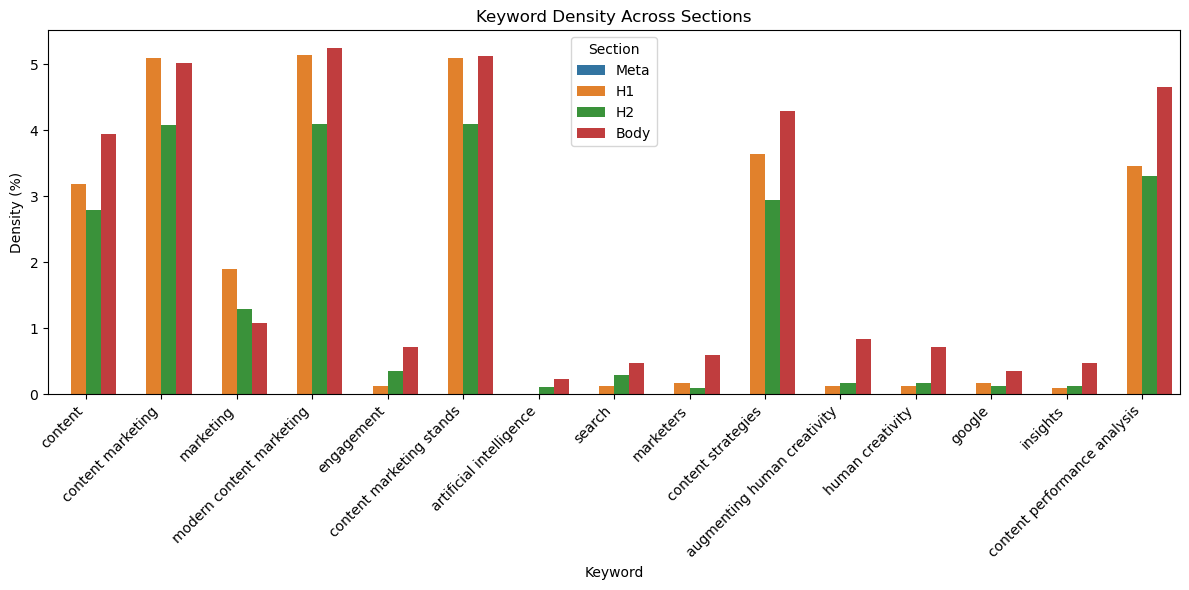

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create DataFrame to hold density values
density_data = []

for phrase in anchor_phrases:
    phrase_tokens = tokenize(phrase)

    meta_density = (phrase_count(meta_count, phrase_tokens) / meta_total * 100) if meta_total else 0
    h1_density = (phrase_count(h1_count, phrase_tokens) / h1_total * 100) if h1_total else 0
    h2_density = (phrase_count(h2_count, phrase_tokens) / h2_total * 100) if h2_total else 0
    body_density = (phrase_count(body_count, phrase_tokens) / body_total * 100) if body_total else 0

    density_data.append({
        "Keyword": phrase,
        "Meta": meta_density,
        "H1": h1_density,
        "H2": h2_density,
        "Body": body_density
    })

df_density = pd.DataFrame(density_data)

# 2. Reshape for Seaborn (melt format)
df_melted = df_density.melt(id_vars="Keyword", var_name="Section", value_name="Density (%)")

# 3. Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Keyword", y="Density (%)", hue="Section")

plt.xticks(rotation=45, ha="right")
plt.title("Keyword Density Across Sections")
plt.tight_layout()
plt.show()


The Matching Engine - Finding Opportunities

Load Required Data

In [56]:
import json

# Load anchor phrases (from Step 4 with YAKE or any extractor)
anchor_phrases = [kw for kw, _ in keywords]  # already extracted from article_text

# Load site content index (from site_content_index.json)
with open("site_content_index.json", "r", encoding="utf-8") as f:
    site_index = json.load(f)


Define the Matching Engine

In [57]:
def direct_match_engine(anchor_phrases, site_index):
    matches = []

    for phrase in anchor_phrases:
        for page in site_index:
            score = 0
            match_type = ""

            # Normalize all text for comparison
            phrase_lower = phrase.lower()
            title = page["title"].lower()
            h1 = " ".join(page.get("h1", [])).lower()
            h2 = " ".join(page.get("h2", [])).lower()

            # Check for direct matches
            if phrase_lower in title:
                score = 3
                match_type = "Title Match"
            elif phrase_lower in h1:
                score = 2
                match_type = "H1 Match"
            elif phrase_lower in h2:
                score = 1
                match_type = "H2 Match"

            if score > 0:
                matches.append({
                    "anchor_phrase": phrase,
                    "matched_url": page["url"],
                    "match_type": match_type,
                    "score": score
                })

    return sorted(matches, key=lambda x: x["score"], reverse=True)


Run the Engine and View Matches

In [58]:
matches = direct_match_engine(anchor_phrases, site_index)

for match in matches[:10]:  # top 10
    print(f"🔗 {match['anchor_phrase']} → {match['matched_url']}")
    print(f"   Type: {match['match_type']} | Score: {match['score']}")


🔗 Content → https://www.yarnit.app/contextual-intelligence
   Type: Title Match | Score: 3
🔗 Content → https://www.yarnit.app/security
   Type: Title Match | Score: 3
🔗 Content → https://www.yarnit.app/manufacturing
   Type: Title Match | Score: 3
🔗 Content → https://www.yarnit.app/healthcare
   Type: Title Match | Score: 3
🔗 Content → https://www.yarnit.app/responsible-ai
   Type: Title Match | Score: 3
🔗 Content → https://www.yarnit.app/ai-writing
   Type: Title Match | Score: 3
🔗 Content → https://www.yarnit.app/blog
   Type: Title Match | Score: 3
🔗 Content → https://www.yarnit.app/technology
   Type: Title Match | Score: 3
🔗 Content → https://www.yarnit.app/content-marketing-with-ai
   Type: Title Match | Score: 3
🔗 Content → https://www.yarnit.app/media-and-publishing
   Type: Title Match | Score: 3


Step 6 & 7: Interactive Link Insertion and HTML Export

In [59]:
from docx import Document

def load_docx_text(file_path):
    doc = Document(file_path)
    return "\n".join([p.text for p in doc.paragraphs if p.text.strip()])

article_text = load_docx_text("The Role of AI in Modern Content Marketing.docx")
print(article_text[:500])


The Role of AI in Modern Content Marketing
In today’s rapidly evolving digital landscape, content marketing stands as a cornerstone for businesses aiming to connect with audiences, establish authority, and fuel growth. The transformative power of Artificial Intelligence (AI) has dramatically reshaped this domain. No longer a futuristic concept, AI is now intrinsically woven into the fabric of how content is conceived, crafted, optimized, distributed, and analyzed. By strategically integrating AI


In [60]:
import yake

kw_extractor = yake.KeywordExtractor(lan="en", n=3, top=15, dedupLim=0.9)
keywords = kw_extractor.extract_keywords(article_text)

anchor_phrases = [kw for kw, _ in keywords]

for kw in anchor_phrases:
    print(kw)


Content
Content Marketing
Marketing
Modern Content Marketing
engagement
content marketing stands
Artificial Intelligence
Search
marketers
content strategies
Augmenting Human Creativity
Human Creativity
Google
insights
Content Performance Analysis


In [61]:
import json

with open("site_content_index.json", "r", encoding="utf-8") as f:
    site_index = json.load(f)


In [62]:
from difflib import get_close_matches

def find_matches(phrase):
    options = []
    for page in site_index:
        if phrase.lower() in page["title"].lower():
            options.append((page["title"], page["url"]))
        elif any(phrase.lower() in h.lower() for h in page.get("h1", [])):
            options.append((page["title"], page["url"]))
    if not options:
        for page in site_index:
            if get_close_matches(phrase.lower(), [page["title"].lower()]):
                options.append((page["title"], page["url"]))
    return options[:3]


In [63]:
from IPython.display import display, HTML
import ipywidgets as widgets

final_links = {}

print("Review and select links for each anchor phrase:")

dropdown_widgets = []

for phrase in anchor_phrases:
    print(f"\n🔗 Anchor Phrase: '{phrase}'")
    suggestions = find_matches(phrase)
    if suggestions:
        options = ['Reject'] + [f"{title} ({url})" for title, url in suggestions]
        dropdown = widgets.Dropdown(options=options, description=phrase[:20], layout=widgets.Layout(width='auto'))
        dropdown_widgets.append((phrase, dropdown))
        display(dropdown)
    else:
        print("No match found.")


Review and select links for each anchor phrase:

🔗 Anchor Phrase: 'Content'


Dropdown(description='Content', layout=Layout(width='auto'), options=('Reject', 'AI-Powered Contextual Intelli…


🔗 Anchor Phrase: 'Content Marketing'


Dropdown(description='Content Marketing', layout=Layout(width='auto'), options=('Reject', 'AI-Powered Content …


🔗 Anchor Phrase: 'Marketing'


Dropdown(description='Marketing', layout=Layout(width='auto'), options=('Reject', 'AI-Powered Contextual Intel…


🔗 Anchor Phrase: 'Modern Content Marketing'
No match found.

🔗 Anchor Phrase: 'engagement'


Dropdown(description='engagement', layout=Layout(width='auto'), options=('Reject', '10 Strategies to Boost Ins…


🔗 Anchor Phrase: 'content marketing stands'


Dropdown(description='content marketing st', layout=Layout(width='auto'), options=('Reject', 'AI-Powered Conte…


🔗 Anchor Phrase: 'Artificial Intelligence'
No match found.

🔗 Anchor Phrase: 'Search'


Dropdown(description='Search', layout=Layout(width='auto'), options=('Reject', 'Search Results (https://www.ya…


🔗 Anchor Phrase: 'marketers'


Dropdown(description='marketers', layout=Layout(width='auto'), options=('Reject', '7 Must-Have AI-Powered Prod…


🔗 Anchor Phrase: 'content strategies'


Dropdown(description='content strategies', layout=Layout(width='auto'), options=('Reject', '10 AI-Powered Cont…


🔗 Anchor Phrase: 'Augmenting Human Creativity'
No match found.

🔗 Anchor Phrase: 'Human Creativity'
No match found.

🔗 Anchor Phrase: 'Google'


Dropdown(description='Google', layout=Layout(width='auto'), options=('Reject', 'SEO-Friendly AI Content: 5 Str…


🔗 Anchor Phrase: 'insights'


Dropdown(description='insights', layout=Layout(width='auto'), options=('Reject', 'AI Marketing Insights Newsle…


🔗 Anchor Phrase: 'Content Performance Analysis'


Dropdown(description='Content Performance ', layout=Layout(width='auto'), options=('Reject', 'Content Publishi…

In [64]:
html_output = article_text

for phrase, dropdown in dropdown_widgets:
    selection = dropdown.value
    if selection != "Reject":
        index = dropdown.options.index(selection) - 1
        title, url = find_matches(phrase)[index]
        linked = f'<a href="{url}" title="{title}">{phrase}</a>'
        html_output = html_output.replace(phrase, linked, 1)

# Save HTML file
with open("linked_article.html", "w", encoding="utf-8") as f:
    f.write(html_output)

display(HTML("<h3>✅ Final HTML generated and saved as 'linked_article.html'</h3>"))



# 🚀 Streamlit Web App for Interactive Link Insertion

In [65]:
streamlit_code = '''
import streamlit as st
import json
from docx import Document
from difflib import get_close_matches
import yake

# Load article
doc = Document("The Role of AI in Modern Content Marketing.docx")
article_text = "\n".join([p.text for p in doc.paragraphs if p.text.strip()])

# Extract keywords using YAKE
kw_extractor = yake.KeywordExtractor(lan="en", n=3, top=15, dedupLim=0.9)
keywords = kw_extractor.extract_keywords(article_text)
anchor_phrases = [kw for kw, _ in keywords]

# Load site index
with open("site_content_index.json", "r", encoding="utf-8") as f:
    site_index = json.load(f)

def find_matches(phrase):
    options = []
    for page in site_index:
        if phrase.lower() in page["title"].lower():
            options.append((page["title"], page["url"]))
        elif any(phrase.lower() in h.lower() for h in page.get("h1", [])):
            options.append((page["title"], page["url"]))
    if not options:
        for page in site_index:
            if get_close_matches(phrase.lower(), [page["title"].lower()]):
                options.append((page["title"], page["url"]))
    return options[:3]

st.title("🔗 Internal Link Suggestion Review")

final_links = {}

for phrase in anchor_phrases:
    st.markdown(f"### 🔍 Anchor Phrase: `{phrase}`")
    suggestions = find_matches(phrase)
    if suggestions:
        options = ["Reject"] + [f"{title} ({url})" for title, url in suggestions]
        selected = st.radio("Select a link:", options, key=phrase)
        if selected != "Reject":
            final_links[phrase] = suggestions[options.index(selected) - 1]
    else:
        st.warning("No good match found.")

if st.button("Generate Final HTML"):
    html_output = article_text
    for phrase, (title, url) in final_links.items():
        linked = f'<a href="{url}" title="{title}">{phrase}</a>'
        html_output = html_output.replace(phrase, linked, 1)
    st.success("✅ Final HTML Generated!")
    st.download_button("Download HTML", data=html_output, file_name="linked_article.html", mime="text/html")
    st.code(html_output, language="html")
'''
with open("link_editor_streamlit.py", "w", encoding="utf-8") as f:
    f.write(streamlit_code)
print("✅ Streamlit app saved as 'link_editor_streamlit.py'")


✅ Streamlit app saved as 'link_editor_streamlit.py'
